# Working with Keras a Deep Dive 
- Creating Keras models with the `Sequential` class, the `Function API`, and `Model Subclassing`
- Using built-in **Keras** `Training` and `Evaluation Loops`
- Using **Keras** `callbacks` to customize training
- Using **TensorBoard** to `Monitor training` and `Evaluation Metrics`
- Writing `Training` and `Evaluation Loops` from sratch

In [1]:
import numpy as np

from tensorflow import keras

## 3 different ways to build Keras model

#### The Sequential Model
It's the most user-friendly API; it's just a Python list. Pros: Ideal for inexperienced users. Cons: constrained to simple layer stacks

The Sequential class

In [2]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
])

Metal device set to: Apple M1 Pro


2022-03-22 19:32:08.194205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-22 19:32:08.194567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Incrementally building a Sequential model

In [3]:
model.add(keras.layers.Dense(10, activation='softmax'))

Build a model

In [4]:
model.build(input_shape=(None, 3))

Checking a model weights

In [5]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 1.25467777e-05, -1.20943949e-01, -1.53224885e-01,
         -8.68571550e-02, -2.70546883e-01,  2.32463598e-01,
         -1.17774010e-02, -1.55422240e-01,  1.75913930e-01,
         -1.48749545e-01, -1.92857236e-01,  4.96582389e-02,
          2.62617826e-01, -2.12030932e-01, -4.90057766e-02,
          2.77251422e-01, -2.07304090e-01,  7.02629387e-02,
         -2.47921050e-01, -1.81252211e-01, -4.16259468e-02,
          1.98020071e-01, -2.68627912e-01, -7.23579228e-02,
         -2.56985307e-01,  1.61339074e-01,  1.27872527e-02,
         -8.86335522e-02,  1.85892224e-01,  6.56902790e-02,
         -1.59544766e-01, -1.51976869e-01,  2.46656239e-01,
         -2.89082438e-01,  2.63829231e-01,  2.53752351e-01,
         -1.26475513e-01,  2.46111333e-01, -2.90879339e-01,
          1.89787298e-01,  1.33743256e-01,  1.66108102e-01,
          2.44359970e-02, -1.22500747e-01, -2.04461336e-01,
          4.82690930e-02,  1.8696

Summary a model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 6,826
Trainable params: 6,826
Non-trainable params: 0
_________________________________________________________________


Naming Each layers

In [7]:
model = keras.Sequential(name='test_model')
model.add(keras.layers.Dense(64, activation='relu', input_shape=(None, 3), name='first_layer'))
model.add(keras.layers.Dense(64, activation='softmax', name='last_layer'))

# summary
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, None, 64)          256       
                                                                 
 last_layer (Dense)          (None, None, 64)          4160      
                                                                 
Total params: 4,416
Trainable params: 4,416
Non-trainable params: 0
_________________________________________________________________


#### The Functional API

Common ways to build a Model.
\
Simple Functional model with two Dense layers



In [8]:
inputs = keras.Input(shape=(3,), name='inputs')
features = keras.layers.Dense(units=64, activation='relu')(inputs)
outputs = keras.layers.Dense(units=10, activation='sigmoid')(features)

model = keras.Model(inputs, outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


Multi-inputs, Multi-outputs Model
\
Building a system to rank customer support ticket by priority and route them to the appropriate department

In [10]:
vocab_size = 10000
num_tags = 100
num_departments = 4

In [38]:
# inputs 

# title of the ticket
title = keras.Input(shape=(vocab_size,), name='title')

# text body of the ticket
text_body = keras.Input(shape=(vocab_size,), name='text_body')

# tags added by the user
tags = keras.Input(shape=(num_tags, ), name='tags')

# features
features = keras.layers.Concatenate()([title, text_body, tags])
features = keras.layers.Dense(units=64, activation='relu')(features)

# outputs
priority = keras.layers.Dense(units=1, activation='sigmoid', name='priority')(features)
department = keras.layers.Dense(units=num_departments, activation='softmax', name='department')(features)

# create the model by specifying its inputs and outputs
model = keras.Model(inputs= [title, text_body, tags], outputs= [priority, department])

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

Training a Multi-input, Multi-output Model

In [15]:
num_samples = 1280

# dummies dataset
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [16]:
# train model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-2),
    loss = ['mean_squared_error', 'categorical_crossentropy'],
    metrics = [['mean_absolute_error'], ['accuracy']]
)

model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs = 1)

2022-03-22 19:34:40.483487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-22 19:34:40.804034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 2s 11ms/step - loss: 281.1333 - priority_loss: 0.3256 - department_loss: 280.8076 - priority_mean_absolute_error: 0.4914 - department_accuracy: 0.2508


In [17]:
# predict

model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])

13/40 [========>.....................] - ETA: 0s - loss: 599.3840 - priority_loss: 0.3391 - department_loss: 599.0449 - priority_mean_absolute_error: 0.5012 - department_accuracy: 0.1202

2022-03-22 19:34:42.614768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 9ms/step - loss: 585.4515 - priority_loss: 0.3281 - department_loss: 585.1232 - priority_mean_absolute_error: 0.4936 - department_accuracy: 0.1211


[585.4515380859375,
 0.3281307816505432,
 585.1232299804688,
 0.4935564696788788,
 0.12109375]

Retrieving the inputs or outputs of a layers in a Functional model

In [36]:
model.layers

In [39]:
# retrive input 
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [20]:
# build a new model using exist inputs
inputs = model.layers[3].input
features = model.layers[4].output

difficulty = keras.layers.Dense(units=3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs = inputs, outputs = [priority, department, difficulty])

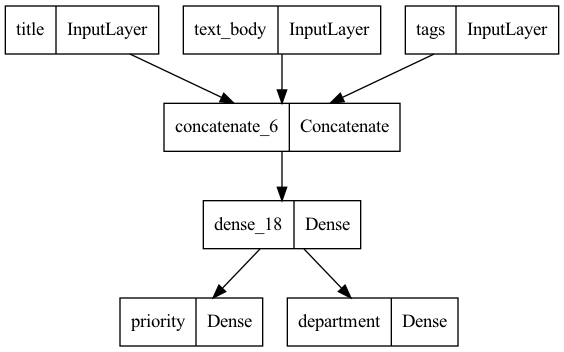

In [43]:
keras.utils.plot_model(model, 'tickets_classifier.png')

In [44]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

Subclassing the Model class

In [45]:
class CustomTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = keras.layers.Concatenate()
        self.mixing_layer = keras.layers.Dense(units=64, activation='relu')
        self.priority_layer = keras.layers.Dense(units=1, activation='sigmoid')
        self.department_classifier = keras.layers.Dense(units=num_departments, activation='softmax')
        
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_layer(features)
        department = self.department_classifier(features)
        
        return priority, department

In [46]:
model = CustomTicketModel(num_departments)

priority, department = model({'title' : title_data, 'text_body': text_body_data, 'tags': tags_data})

In [47]:
# compile and train are the same as Functional and Sequential Models
model.compile(
    optimizer = 'rmsprop',
    loss = ['mean_squared_error', 'categorical_crossentropy'],
    metrics = [['mean_absolute_error'], ['accuracy']],
)

model.fit(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
    [priority_data, department_data],
    epochs=1
)

 1/40 [..............................] - ETA: 18s - loss: 4.2929 - output_1_loss: 0.1116 - output_2_loss: 4.1813 - output_1_mean_absolute_error: 0.2610 - output_2_accuracy: 0.4062

2022-03-22 19:54:03.023016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 13ms/step - loss: 28.8591 - output_1_loss: 0.3172 - output_2_loss: 28.5418 - output_1_mean_absolute_error: 0.4820 - output_2_accuracy: 0.2953


In [48]:
model.evaluate(
    {'title': title_data, 'text_body': text_body_data, 'tags': tags_data},
    [priority_data, department_data],
)

priority_pred, department_pred = model.predict( {'title': title_data, 'text_body': text_body_data, 'tags': tags_data},)

13/40 [========>.....................] - ETA: 0s - loss: 31.3204 - output_1_loss: 0.3391 - output_2_loss: 30.9813 - output_1_mean_absolute_error: 0.5012 - output_2_accuracy: 0.2452

2022-03-22 19:54:03.910078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 9ms/step - loss: 30.0347 - output_1_loss: 0.3281 - output_2_loss: 29.7065 - output_1_mean_absolute_error: 0.4936 - output_2_accuracy: 0.2508


2022-03-22 19:54:04.489501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [35]:
priority_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## Built-in trraining and evaluation loops

**Early Stopping**: Stop the training when the metrics is no longer improving.
**Model checkpoointing** Saving the current state of the model at different points during the training

In [50]:
# custom callback function
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2,),
    keras.callbacks.ModelCheckpoint(filepath='checkpoint_path.keras', monitor='val_loss', save_best_only=True)
]

In [54]:
# training mnist dataset
from tensorflow.keras.datasets import mnist

In [109]:
# preapare dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale dataset
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# train and validation dataset split
x_train, x_val = x_train[10000:], x_train[:10000]
y_train, y_val = y_train[10000:], y_train[:10000]

In [110]:
# build a model
# functional model (fully connected neural networks)

def mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = keras.layers.Dense(units=64, activation='relu')(inputs)
    features = keras.layers.Dense(units=64, activation='relu')(features)
    outputs = keras.layers.Dense(units=10, activation='softmax')(features)
    
    model = keras.Model(inputs, outputs)
    return model

In [111]:
m = mnist_model()
m.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_79 (Dense)            (None, 64)                50240     
                                                                 
 dense_80 (Dense)            (None, 64)                4160      
                                                                 
 dense_81 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [112]:
# compile and train
m.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

m.fit(x_train, y_train, callbacks=callbacks_list, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
 1/98 [..............................] - ETA: 29s - loss: 2.3506 - accuracy: 0.0820

2022-03-22 20:50:43.704937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 1s 9ms/step - loss: 0.6365 - accuracy: 0.8362 - val_loss: 0.3161 - val_accuracy: 0.9092
Epoch 2/20
 1/98 [..............................] - ETA: 0s - loss: 0.2735 - accuracy: 0.9258

2022-03-22 20:50:44.607943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 1s 7ms/step - loss: 0.2716 - accuracy: 0.9212 - val_loss: 0.2503 - val_accuracy: 0.9278
Epoch 3/20
98/98 [==============================] - 1s 7ms/step - loss: 0.2129 - accuracy: 0.9387 - val_loss: 0.2033 - val_accuracy: 0.9381
Epoch 4/20
98/98 [==============================] - 1s 8ms/step - loss: 0.1798 - accuracy: 0.9473 - val_loss: 0.1708 - val_accuracy: 0.9498
Epoch 5/20
98/98 [==============================] - 1s 9ms/step - loss: 0.1568 - accuracy: 0.9545 - val_loss: 0.1543 - val_accuracy: 0.9530
Epoch 6/20
98/98 [==============================] - 1s 8ms/step - loss: 0.1379 - accuracy: 0.9590 - val_loss: 0.1416 - val_accuracy: 0.9578
Epoch 7/20
98/98 [==============================] - 1s 8ms/step - loss: 0.1221 - accuracy: 0.9637 - val_loss: 0.1387 - val_accuracy: 0.9581
Epoch 8/20
98/98 [==============================] - 1s 8ms/step - loss: 0.1099 - accuracy: 0.9680 - val_loss: 0.1276 - val_accuracy: 0.9621
Epoch 9/20
98/98 [=============

In [114]:
load_model = keras.models.load_model('checkpoint_path.keras')

In [116]:
load_model.evaluate(x_test, y_test)

 23/313 [=>............................] - ETA: 1s - loss: 0.0933 - accuracy: 0.9660

2022-03-22 20:52:19.137094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.1095 - accuracy: 0.9664


[0.10946598649024963, 0.9664000272750854]

In [123]:
prediction = x_test[0:10]
test_pred = load_model.predict(prediction)

In [133]:
for i in range(len(test_pred)):
    print(np.argmax(test_pred[i]), y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


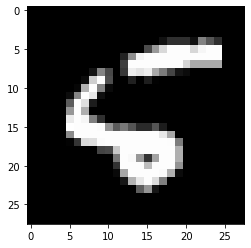

In [141]:
t = x_test[8].reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(t, cmap='gray')

Tensorboard
- Visually monitor metrics during training 
- Visualize your model architecture
- Visualize histograms of activations and gradients
- Explore embeddings in 3D

In [142]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir = 'full_path_to_your_log_dir',
)

In [154]:
m.fit(x_train, y_train, callbacks=[tensorboard], epochs=5, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/5
98/98 [==============================] - 1s 9ms/step - loss: 0.0168 - accuracy: 0.9957 - val_loss: 0.1293 - val_accuracy: 0.9644
Epoch 2/5
98/98 [==============================] - 1s 8ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.1085 - val_accuracy: 0.9736
Epoch 3/5
98/98 [==============================] - 1s 7ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.1061 - val_accuracy: 0.9747
Epoch 4/5
98/98 [==============================] - 1s 8ms/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.1074 - val_accuracy: 0.9737
Epoch 5/5
98/98 [==============================] - 1s 7ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.1129 - val_accuracy: 0.9736


In [146]:
!pip install tensorboard

In [153]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir